1. Import and become one with the data

In [19]:
import zipfile
import tensorflow
import os
import urllib.request

url = "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip"
filename="10_food_classes_all_data.zip"

if not os.path.exists(filename):
    urllib.request.urlretrieve(url,filename)
else:
    print("Already exist ")
    
if not os.path.exists("10_food_classes_all_data"): 
    print("Dezarhivez...")
    with zipfile.ZipFile(filename, "r") as zip_ref:
        zip_ref.extractall()
    print("Gata!")
else:
    print("Folderul este deja dezarhivat.")

Dezarhivez...
Gata!


In [1]:
import zipfile
import tensorflow
import os
import urllib.request
print(len(os.listdir('10_food_classes_all_data')))
directories='pizza_steak'

for path,dir,file in os.walk(directories):
    print(f"There are {len(dir)} directories and {len(file)} images in {path} ")

2
There are 2 directories and 0 images in pizza_steak 
There are 2 directories and 0 images in pizza_steak\test 
There are 0 directories and 250 images in pizza_steak\test\pizza 
There are 0 directories and 250 images in pizza_steak\test\steak 
There are 2 directories and 0 images in pizza_steak\train 
There are 0 directories and 750 images in pizza_steak\train\pizza 
There are 0 directories and 750 images in pizza_steak\train\steak 


In [36]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [37]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [2]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,sub_directory,target_class):
    full_path=target_dir+"/"+sub_directory+"/"+target_class
    
    random_images=random.choice(os.listdir(full_path))
    
    img=mpimg.imread(full_path+"/"+random_images)
    plt.imshow(img)
    plt.title(target_class)
    plt.axis(False)
    print(f"Image shape: {img.shape}")
    return img

Image shape: (512, 512, 3)


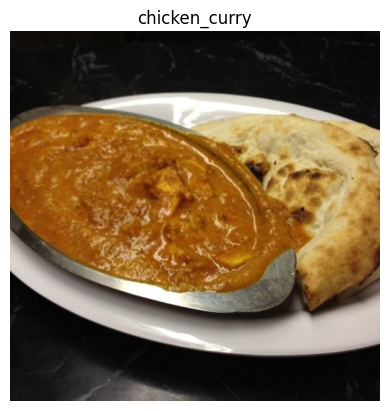

In [14]:
image=view_random_image("10_food_classes_all_data","train","chicken_curry")

Image shape: (512, 384, 3)
Image shape: (288, 512, 3)


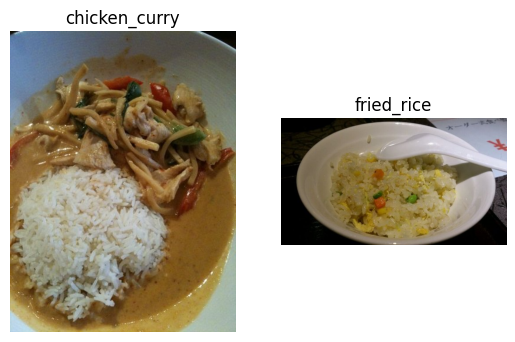

In [20]:
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
steak_img=view_random_image("10_food_classes_all_data","train","chicken_curry")
plt.subplot(1,2,2)
pizza_img=view_random_image("10_food_classes_all_data","train","fried_rice")


In [50]:
import tensorflow as tf
import matplotlib.pyplot as plt

def load_and_prep_image(filename,input_shape=224):
    img=tf.io.read_file(filename)
    
    image = tf.image.decode_image(img, channels=3)
    
    image=tf.image.resize(image,size=[input_shape,input_shape])
    
    image=image/255.
    
    return image

In [ ]:
load_and_prep_image('pizza_steak/train/steak/3136.jpg')

In [31]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

2. Preprocess the data

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             class_mode='categorical',
                                             batch_size=32
)
test_data=test_datagen.flow_from_directory(test_dir,
                                           batch_size=32,
                                            target_size=(224,224),
                                           class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


As with binary classifcation, we've creator image generators. The main change this time is that we've changed the class_mode parameter to 'categorical' because we're dealing with 10 classes of food images.

Everything else like rescaling the images, creating the batch size and target image size stay the same.

Majoritatea arhitecturilor clasice (precum VGG16, pe care se bazeaza TinyVGG-ul tau) reduc dimensiunea imaginii la jumatate de 5 ori consecutiv (folosind 5 straturi de MaxPool2D)

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_1=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation='softmax')
])
model_1.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)


4. Fit a model

In [30]:
history_1=model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 179s 758ms/step - accuracy: 0.2364 - loss: 2.1002 - val_accuracy: 0.2680 - val_loss: 2.0358
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 171ms/step - accuracy: 0.3796 - loss: 1.8016 - val_accuracy: 0.3744 - val_loss: 1.7994
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 179ms/step - accuracy: 0.5137 - loss: 1.4435 - val_accuracy: 0.3664 - val_loss: 1.8738
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 180ms/step - accuracy: 0.7152 - loss: 0.8732 - val_accuracy: 0.3252 - val_loss: 2.4256
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 46s 196ms/step - accuracy: 0.8849 - loss: 0.3719 - val_accuracy: 0.2964 - val_loss: 3.3778



5. Evaluate the model

In [43]:
model_1.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.2964 - loss: 3.3778


[3.3777992725372314, 0.2964000105857849]

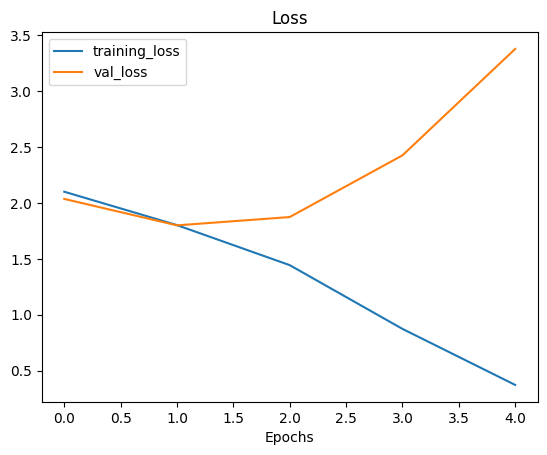

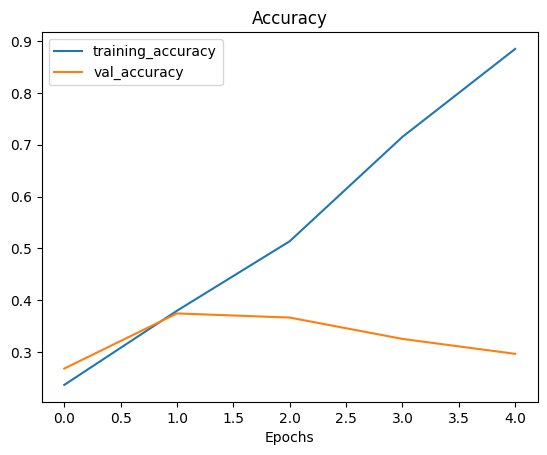

In [44]:
plot_loss_curves(history_1)

In [41]:
# Try a simplified model (removed two layers)
model_2 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_2.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_2 = model_2.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5


C:\Users\darius\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 103ms/step - accuracy: 0.2335 - loss: 2.0982 - val_accuracy: 0.3124 - val_loss: 1.9574
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 103ms/step - accuracy: 0.3951 - loss: 1.7719 - val_accuracy: 0.3448 - val_loss: 1.8769
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 106ms/step - accuracy: 0.5111 - loss: 1.4544 - val_accuracy: 0.3764 - val_loss: 1.8042
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 105ms/step - accuracy: 0.6583 - loss: 1.0761 - val_accuracy: 0.3468 - val_loss: 1.9714
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 107ms/step - accuracy: 0.7920 - loss: 0.7103 - val_accuracy: 0.3408 - val_loss: 2.2414


In [45]:
model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.3408 - loss: 2.2414


[2.2413747310638428, 0.3407999873161316]

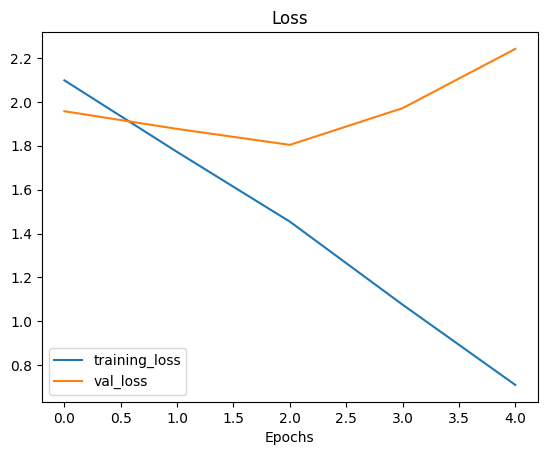

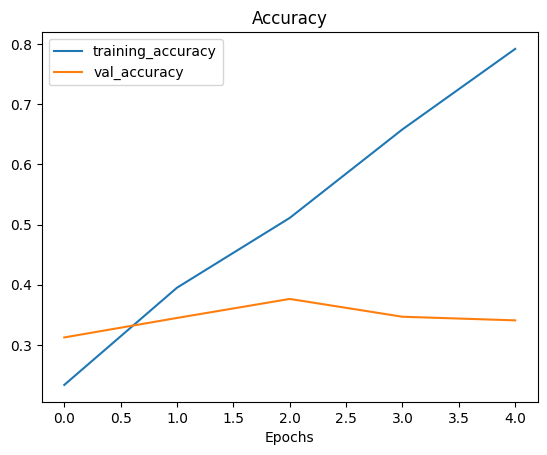

In [42]:
plot_loss_curves(history_2)

Our model is overfitting so let s do:

DAta augmentation makes it harder for the model to learn on the training data and in turn, hopefully making the patterns it learns more generalizable to unseen data.

In [46]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [47]:
# Clone the model (use the same architecture)
model_3 = tf.keras.models.clone_model(model_2)

# Compile the cloned model 
model_3.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 58s 246ms/step - accuracy: 0.1924 - loss: 2.1908 - val_accuracy: 0.2452 - val_loss: 2.0734
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 68s 291ms/step - accuracy: 0.2636 - loss: 2.0814 - val_accuracy: 0.3368 - val_loss: 1.9189
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 58s 249ms/step - accuracy: 0.2852 - loss: 2.0356 - val_accuracy: 0.3668 - val_loss: 1.8713
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 58s 249ms/step - accuracy: 0.3108 - loss: 1.9875 - val_accuracy: 0.3832 - val_loss: 1.8245
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 59s 250ms/step - accuracy: 0.3248 - loss: 1.9565 - val_accuracy: 0.3864 - val_loss: 1.8073


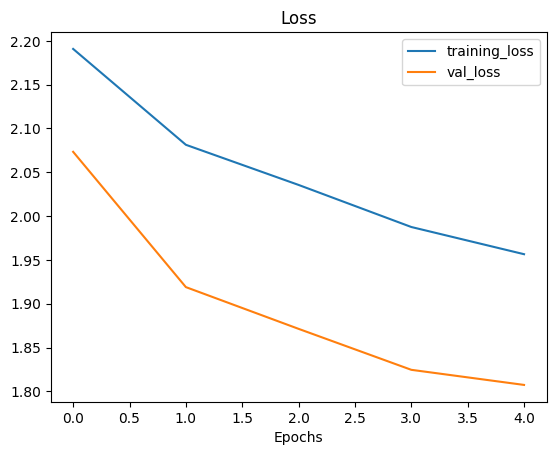

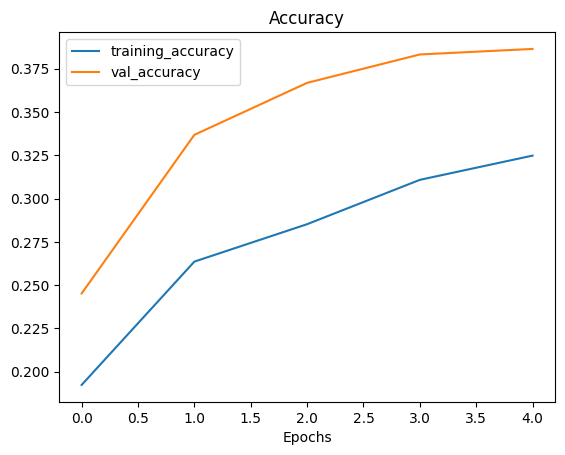

In [60]:
plot_loss_curves(history_3)

In [61]:
model_3.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.3864 - loss: 1.8073


[1.8072935342788696, 0.3864000141620636]

In [57]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


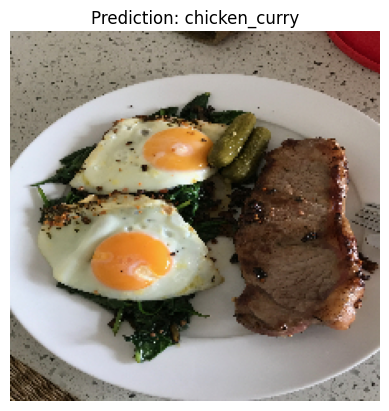

In [59]:
pred_and_plot(model=model_3, 
              filename="03-steak.jpeg", 
              class_names=class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


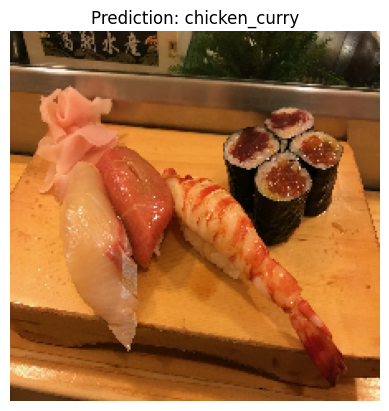

In [55]:
pred_and_plot(model_3, "03-sushi.jpeg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


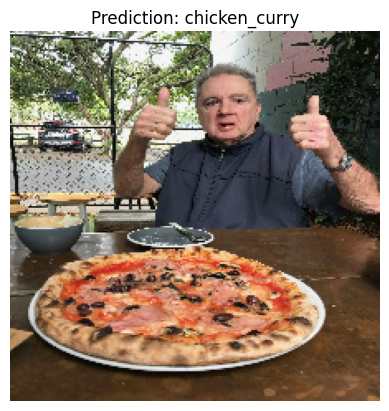

In [56]:
pred_and_plot(model_3, "03-pizza-dad.jpeg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


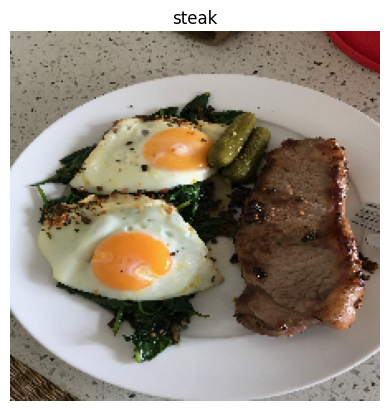

In [62]:
# Load in and preprocess our custom image
img = load_and_prep_image("03-steak.jpeg")

# Make a prediction
pred = model_3.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

In [63]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


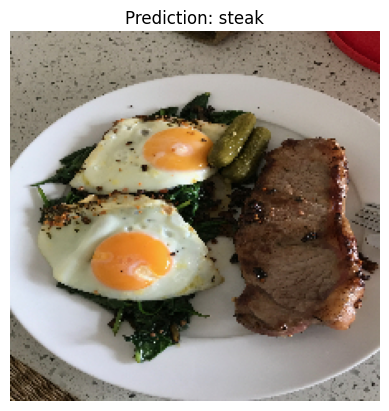

In [65]:
pred_and_plot(model_3, "03-steak.jpeg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


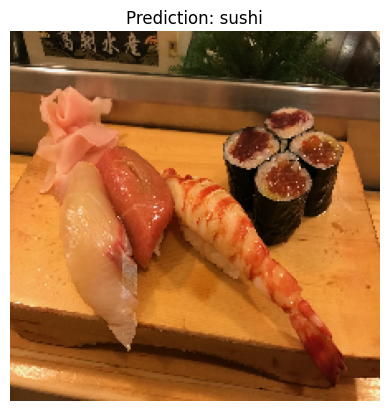

In [67]:
pred_and_plot(model_3, "03-sushi.jpeg", class_names)